# Emergency Dispatch Response Times

[Original Data Set](https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3/about_data)

Fire Department Calls for Service San Francisco

This analysis is an exploratory data analysis observing the difference in time between call received to emergency services and dispatch time.

The data set contains timestamp data for emergency services in the San Franscisco Area.

| Field Name | Data Type | Definition | 
| --- | --- | --- |
| Call Number | Text | A unique 9-digit number assigned by the 911 Dispatch Center (DEM) to this call. These number are used for both Police and Fire calls. | 
| Unit ID | Text | Unit Identifier. For example E01 for Engine 1 or T01 for Truck 1. | 
| Incident Number | Text | A unique 8-digit number assigned by DEM to this Fire incident. | 
|  Call Date | Date & Time | Date the call is received at the 911 Dispatch Center. Used for reporting purposes. | 
| Call Type | Text | Type of call the incident falls into. See the list below. | 
| Watch Date | Date & Time | Watch date when the call is received. Watch date starts at 0800 each morning and ends at 0800 the next day. | 
| Received DtTm | Date & Time | Date and time of call is received at the 911 Dispatch Center. | 
| Entry DtTm | Date & Time | Date and time the 911 operator submits the entry of the initical call information into the CAD system | 
| Dispatch DtTm | Date & Time | Date and time the 911 operator dispatches this unit to the call. | 
| Response DtTm | Date & Time | Date and time this unit acknowledges the dispatch and records that the unit is en route to the location of the call. | 
| On Scene DtTm | Date & Time | Date and time the unit records arriving to the location of the incident | 
| AVL Validated On Scene DtTm | Date & Time | Updated date and time the unit arrived on scene based on existing unit AVL coordinates. | 
| Transport DtTm | Date & Time | If this unit is an ambulance, date and time the unit begins the transport unit arrives to hospital | 
| Hospital DtTm | Date & Time | If this unit is an ambulance, date and time the unit arrives to the hospital. | 
| Call Final Disposition | Text | Disposition of the call (Code). For example TH2: Transport to Hospital - Code 2, FIR: Resolved by Fire Department | 
| Available DtTm | Date & Time | Date and time this unit is not longer assigned to this call and it is available for another dispatch. | 
| Address | Text | Address of midblock point associated with incident (obfuscated address to protect caller privacy) | 
| City | Text | City of incident | 
| Zipcode of Incident | Text | Zipcode of incident | 
| Battalion | Text | Emergency Response District (There are 9 Fire Emergency Response Districts) | 
| Station Area | Text | Fire Station First Response Area associated with the address of the incident | 
| Box | Text | Fire box associated with the address of the incident. A box is the smallest area used to divide the City. Each box is associated with a unique unit dispatch order. The City is divided into more than 2,400 boxes. | 
| Original Priority | Text | Initial call priority (Code 2: Non-Emergency or Code 3:Emergency). | 
| Priority | Text | Call priority (Code 2: Non-Emergency or Code 3:Emergency). | 
| Final Priority | Text | Final call priority (Code 2: Non-Emergency or Code 3:Emergency). | 
| ALS Unit | Boolean (True/False) | Does this unit includes ALS (Advance Life Support) resources? Is there a paramedic in this unit? | 
| Call Type Group | Text | Call types are divided into four main groups: Fire, Alarm, Potential Life Threatening and Non Life Threatening. | 
| Number of Alarms | Numeric | Number of alarms associated with the incident. This is a number between 1 and 5. | 
| Unit Type | Text | Unit type | 
| Unit sequence in call dispatch | Numeric | A number that indicates the order this unit was assigned to this call | 
| Location | Coordinates | Latitude and longitude of address obfuscated either to the midblock, intersection or call box | 
| Fire Prevention District | Text | Bureau of Fire Prevention District associated with this address | 
| Supervisor District | Text | Supervisor District associated with this address | 
| Neighborhood District | Text | Neighborhood District associated with this address, boundaries available here: https://data.sfgov.org/d/p5b7-5n3h | 
| RowID | Text | Unique identifier used for managing data updates. It is the concatenation of Call Number and Unit ID separated by a dash | 


In [1]:
import pandas as pd
import numpy as np
import datetime
import os

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:/Users/raven/Desktop')
os.getcwd()

'C:\\Users\\raven\\Desktop'

In [3]:
file = 'Data_Clean_Fire_Department_Calls_for_Service.csv'
df = pd.read_csv(file)

df.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,RowID,case_location,data_as_of,data_loaded_at,Analysis Neighborhoods
0,80670268,82,8020924,Medical Incident,03/07/2008,03/07/2008,03/07/2008 04:05:37 PM,03/07/2008 04:06:05 PM,03/07/2008 04:06:59 PM,NaN,...,MEDIC,1.0,3.0,6.0,Tenderloin,080670268-82,POINT (-122.408595110869 37.783706930155),NaN,11/30/2023 09:35:04 AM,36.0
1,80380388,B08,8012119,Alarms,02/07/2008,02/07/2008,02/07/2008 10:03:52 PM,02/07/2008 10:05:51 PM,02/07/2008 10:05:56 PM,02/07/2008 10:07:10 PM,...,CHIEF,3.0,8.0,7.0,Lakeshore,080380388-B08,POINT (-122.477956520245 37.726931055875),NaN,11/30/2023 09:35:04 AM,16.0
2,80140144,E33,8004586,Medical Incident,01/14/2008,01/14/2008,01/14/2008 11:16:19 AM,01/14/2008 11:17:02 AM,01/14/2008 11:17:28 AM,01/14/2008 11:17:42 AM,...,ENGINE,1.0,NaN,NaN,NaN,080140144-E33,POINT (-122.458070201117 37.707056853977),NaN,11/30/2023 09:35:04 AM,NaN
3,81430195,93,8044077,Medical Incident,05/22/2008,05/22/2008,05/22/2008 11:20:59 AM,05/22/2008 11:21:49 AM,05/22/2008 11:22:52 AM,05/22/2008 11:23:17 AM,...,MEDIC,3.0,6.0,9.0,Mission,081430195-93,POINT (-122.419206043807 37.760235355933),NaN,11/30/2023 09:35:04 AM,20.0
4,80820048,E16,8025231,Structure Fire,03/22/2008,03/21/2008,03/22/2008 03:55:53 AM,03/22/2008 03:57:23 AM,03/22/2008 03:57:34 AM,NaN,...,ENGINE,3.0,4.0,2.0,Marina,080820048-E16,POINT (-122.431093553081 37.800015392373),NaN,11/30/2023 09:35:04 AM,13.0


In [4]:
df.columns

Index(['Call Number', 'Unit ID', 'Incident Number', 'Call Type', 'Call Date',
       'Watch Date', 'Received DtTm', 'Entry DtTm', 'Dispatch DtTm',
       'Response DtTm', 'On Scene DtTm', 'Transport DtTm', 'Hospital DtTm',
       'Call Final Disposition', 'Available DtTm', 'Address', 'City',
       'Zipcode of Incident', 'Battalion', 'Station Area', 'Box',
       'Original Priority', 'Priority', 'Final Priority', 'ALS Unit',
       'Call Type Group', 'Number of Alarms', 'Unit Type',
       'Unit sequence in call dispatch', 'Fire Prevention District',
       'Supervisor District', 'Neighborhooods - Analysis Boundaries', 'RowID',
       'case_location', 'data_as_of', 'data_loaded_at',
       'Analysis Neighborhoods'],
      dtype='object')

In [5]:
df.shape

(6474506, 37)

## Data Cleaning and Transformation

- The data set is huge. 
- 6M + rows
- Drop irrelevant columns

In [6]:
df.drop(['Available DtTm', 'Entry DtTm', 'Call Date', 'Watch Date', 'Response DtTm', 'On Scene DtTm', 'Transport DtTm', 'Hospital DtTm', 'Address', 'Zipcode of Incident', 'Box', 'Original Priority', 'Priority', 'Final Priority', 'ALS Unit', 'Call Type Group', 'Number of Alarms', 'RowID', 'case_location', 'data_as_of', 'data_loaded_at','Analysis Neighborhoods'], axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474506 entries, 0 to 6474505
Data columns (total 15 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Call Number                           int64  
 1   Unit ID                               object 
 2   Incident Number                       int64  
 3   Call Type                             object 
 4   Received DtTm                         object 
 5   Dispatch DtTm                         object 
 6   Call Final Disposition                object 
 7   City                                  object 
 8   Battalion                             object 
 9   Station Area                          object 
 10  Unit Type                             object 
 11  Unit sequence in call dispatch        float64
 12  Fire Prevention District              float64
 13  Supervisor District                   float64
 14  Neighborhooods - Analysis Boundaries  object 
dtypes: float64(3), 

In [8]:
#df.head().to_csv('head.csv')

### Data Validation: Duplicates

- No Double Counting
-  Duplicate Check

In [9]:
print(df.duplicated().values.any() == True)

False


- No rows are unique
- Not good enough
- Verify by subsetting the unique ID's: 'Call Number', 'Unit ID', 'Incident Number'

In [10]:
print(df.duplicated(subset = ['Call Number', 'Unit ID', 'Incident Number']).values.any())
print(df.duplicated(subset = ['Unit ID', 'Incident Number']).values.any())
print(df.duplicated(subset = ['Call Number', 'Unit ID']).values.any())
print(df.duplicated(subset = ['Call Number', 'Incident Number']).values.any())

False
False
False
True


No duplicates were found containing all 3 unique identifiers. 

Call Number and Incident Number did have duplicates.

In [11]:
print( "Duplicate Row Count: " + str(pd.DataFrame(df[df.duplicated(subset = ['Call Number', 'Incident Number'])]).shape[0]))

Duplicate Row Count: 3491402


#### 349,000 duplicates. What's going on?



In [12]:
pd.DataFrame(df[df.duplicated(subset = ['Call Number', 'Incident Number'])]).sort_values(by='Call Number').head()

,Call Number,Unit ID,Incident Number,Call Type,Received DtTm,Dispatch DtTm,Call Final Disposition,City,Battalion,Station Area,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries
3478328,1030101,M12,306091,Medical Incident,04/12/2000 09:00:29 PM,04/12/2000 09:02:00 PM,Other,SF,B08,18,MEDIC,2.0,8.0,4.0,Sunset/Parkside
3512605,1030104,M14,30612,Medical Incident,04/12/2000 09:09:02 PM,04/12/2000 09:10:29 PM,Other,SF,B08,23.0,MEDIC,2.0,8.0,4.0,Sunset/Parkside
3463036,1030107,E01,30615,Alarms,04/12/2000 09:13:47 PM,04/12/2000 09:14:13 PM,Other,SF,B03,01,ENGINE,3.0,3.0,6.0,Tenderloin
3509241,1030107,T01,30615,Alarms,04/12/2000 09:13:47 PM,04/12/2000 09:14:13 PM,Other,SF,B03,1.0,TRUCK,1.0,3.0,6.0,Tenderloin
3546027,1030108,M01,30616,Medical Incident,04/12/2000 09:14:43 PM,04/12/2000 09:16:24 PM,Other,SF,B03,1,MEDIC,1.0,1.0,3.0,Financial District/South Beach


#### Answer: Dual Classification for separate vehicle types

Notice the 3rd and 4th row above: 
- Same call
- Same timestamps: Received, entry, and dispatch
- Separate Unit ID ->  Unit ID: T01 == Unit Type: Truck



### 2 Options: 
1. Remove duplicates and focus with the same 'Call Number' and 'Incident Number'
   -  Remove unit identifiers: 'Unit ID', 'Unit Type', 'Unit Sequence' 
2. Include all vehicles as part on the analysis
   - imbalanced call weighting, but accounts for all vehicles

Call-to-Dispatch Time is the focus of the analysis: **Option 1** is selected

- remove duplicates
- remove Unit Fields

In [13]:
#Drop the duplicates & the Unit columns
df = df.drop_duplicates(subset = ['Call Number', 'Incident Number'], keep='first').drop(['Unit ID','Unit Type','Unit sequence in call dispatch'], axis = 1)

In [14]:
# Drop the unique identifiers
df.drop(['Call Number', 'Incident Number'], axis = 1, inplace = True)

# See DataFrame Row x Column Count
df.shape

(2983104, 10)

In [15]:
df.columns

Index(['Call Type', 'Received DtTm', 'Dispatch DtTm', 'Call Final Disposition',
       'City', 'Battalion', 'Station Area', 'Fire Prevention District',
       'Supervisor District', 'Neighborhooods - Analysis Boundaries'],
      dtype='object')

### Data Validation: Missing Values

In [16]:
print(df.isnull().values.any() == True)

True


In [17]:
# Which columns have missing values

df.isna().sum()

Call Type                                   0
Received DtTm                               0
Dispatch DtTm                               0
Call Final Disposition                      0
City                                     4898
Battalion                                   0
Station Area                             1166
Fire Prevention District                28475
Supervisor District                     11969
Neighborhooods - Analysis Boundaries    12260
dtype: int64

#### Dispatch time is unaffected

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2983104 entries, 0 to 6474495
Data columns (total 10 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Call Type                             object 
 1   Received DtTm                         object 
 2   Dispatch DtTm                         object 
 3   Call Final Disposition                object 
 4   City                                  object 
 5   Battalion                             object 
 6   Station Area                          object 
 7   Fire Prevention District              float64
 8   Supervisor District                   float64
 9   Neighborhooods - Analysis Boundaries  object 
dtypes: float64(2), object(8)
memory usage: 250.4+ MB


### Data Validation: Date Time Conversions

In [19]:
df['Received DtTm']= pd.to_datetime(df['Received DtTm'], format = '%m/%d/%Y %I:%M:%S %p')


In [20]:
df['Dispatch DtTm']= pd.to_datetime(df['Dispatch DtTm'], format ='%m/%d/%Y %I:%M:%S %p')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2983104 entries, 0 to 6474495
Data columns (total 10 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   Call Type                             object        
 1   Received DtTm                         datetime64[ns]
 2   Dispatch DtTm                         datetime64[ns]
 3   Call Final Disposition                object        
 4   City                                  object        
 5   Battalion                             object        
 6   Station Area                          object        
 7   Fire Prevention District              float64       
 8   Supervisor District                   float64       
 9   Neighborhooods - Analysis Boundaries  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 250.4+ MB


### Data Transformation: Create Dispatch Time Column in Seconds
- Dispatch Timestamp - Received Timestamp

In [22]:
df['dispatch_seconds'] = (df['Dispatch DtTm'] - df['Received DtTm']).dt.total_seconds()
df.head()

,Call Type,Received DtTm,Dispatch DtTm,Call Final Disposition,City,Battalion,Station Area,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,dispatch_seconds
0,Medical Incident,2008-03-07 16:05:37,2008-03-07 16:06:59,SFPD,SF,B03,1.0,3.0,6.0,Tenderloin,82.0
1,Alarms,2008-02-07 22:03:52,2008-02-07 22:05:56,Other,SF,B08,19.0,8.0,7.0,Lakeshore,124.0
2,Medical Incident,2008-01-14 11:16:19,2008-01-14 11:17:28,Other,DC,B09,33.0,NaN,NaN,NaN,69.0
3,Medical Incident,2008-05-22 11:20:59,2008-05-22 11:22:52,Other,SF,B06,7.0,6.0,9.0,Mission,113.0
4,Structure Fire,2008-03-22 03:55:53,2008-03-22 03:57:34,Other,SF,B04,16.0,4.0,2.0,Marina,101.0


In [23]:
df['dispatch_seconds'].describe()

count    2.983104e+06
mean     1.466500e+02
std      1.090522e+03
min     -1.798010e+05
25%      6.600000e+01
50%      1.150000e+02
75%      1.760000e+02
max      9.944600e+04
Name: dispatch_seconds, dtype: float64

### Minimum values below 0 make no sense
- You can't talk for negative minnutes

In [24]:
print("Count of Negative call records: " + str(df[df['dispatch_seconds']<0].shape[0]))

Count of Negative call records: 237


In [25]:
# remove the invalid records
df = df[df['dispatch_seconds']>0]
df.head()

,Call Type,Received DtTm,Dispatch DtTm,Call Final Disposition,City,Battalion,Station Area,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,dispatch_seconds
0,Medical Incident,2008-03-07 16:05:37,2008-03-07 16:06:59,SFPD,SF,B03,1.0,3.0,6.0,Tenderloin,82.0
1,Alarms,2008-02-07 22:03:52,2008-02-07 22:05:56,Other,SF,B08,19.0,8.0,7.0,Lakeshore,124.0
2,Medical Incident,2008-01-14 11:16:19,2008-01-14 11:17:28,Other,DC,B09,33.0,NaN,NaN,NaN,69.0
3,Medical Incident,2008-05-22 11:20:59,2008-05-22 11:22:52,Other,SF,B06,7.0,6.0,9.0,Mission,113.0
4,Structure Fire,2008-03-22 03:55:53,2008-03-22 03:57:34,Other,SF,B04,16.0,4.0,2.0,Marina,101.0


## Export CSV for Later BI Tool Use

In [26]:
df.to_csv('df_final.csv')

## Examine Qualitative Categorical Variables without Missing Values

In [27]:
# Fields without missing values
groups = ['Call Type', 'Call Final Disposition', 'Battalion']

In [28]:
for g in groups:
    print(f'Unique Value Count of {g}: \n {df[g].nunique()} \n')

Unique Value Count of Call Type: 
 33 

Unique Value Count of Call Final Disposition: 
 15 

Unique Value Count of Battalion: 
 12 



In [29]:
call_type_eda = pd.DataFrame(df.groupby(['Call Type'])['dispatch_seconds'].agg(['mean', 'median', 'sum', 'std', 'max', 'min']).reset_index())
call_type_eda.head()

,Call Type,mean,median,sum,std,max,min
0,Administrative,2279.851064,184.0,107153.0,6247.647477,30257.0,1.0
1,Aircraft Emergency,225.220588,107.0,30630.0,1056.256925,12374.0,15.0
2,Alarms,116.638162,103.0,28125310.0,110.811119,14389.0,1.0
3,Assist Police,175.867609,81.0,136825.0,727.664273,16931.0,1.0
4,Citizen Assist / Service Call,182.269731,131.0,13764281.0,318.979242,20011.0,1.0


In [30]:
disposition_eda = pd.DataFrame(df.groupby(['Call Final Disposition'])['dispatch_seconds'].agg(['mean', 'median', 'sum', 'std', 'max', 'min']).reset_index())
disposition_eda.head()

,Call Final Disposition,mean,median,sum,std,max,min
0,Against Medical Advice,169.401106,108.0,5942252.0,350.202990,25778.0,1.0
1,CHP,209.592326,168.0,87400.0,163.083912,1328.0,1.0
2,Cancelled,145.815240,97.0,7030336.0,316.787260,20795.0,1.0
3,Code 2 Transport,174.980841,128.0,181251279.0,307.222623,58382.0,1.0
4,Code 3 Transport,158.931717,108.0,10992989.0,254.464128,9079.0,1.0


In [31]:
battalion_eda = pd.DataFrame(df.groupby(['Battalion'])['dispatch_seconds'].agg(['mean', 'median', 'sum', 'std', 'max', 'min']).reset_index())
battalion_eda.head()

,Battalion,mean,median,sum,std,max,min
0,3E,57.500000,57.5,115.0,20.506097,72.0,43.0
1,B01,154.104462,114.0,46942839.0,251.048620,25336.0,1.0
2,B02,157.221431,116.0,85642601.0,260.249723,33459.0,1.0
3,B03,159.482193,119.0,82214825.0,284.267276,58382.0,1.0
4,B04,159.084617,119.0,45747645.0,294.592353,65681.0,1.0


## Export CSV of EDA tables

In [32]:
call_type_eda.to_csv('call_type_eda.csv')
disposition_eda.to_csv('disposition_eda.csv')
battalion_eda.to_csv('battalion_eda.csv')

<Axes: xlabel='mean', ylabel='Call Type'>

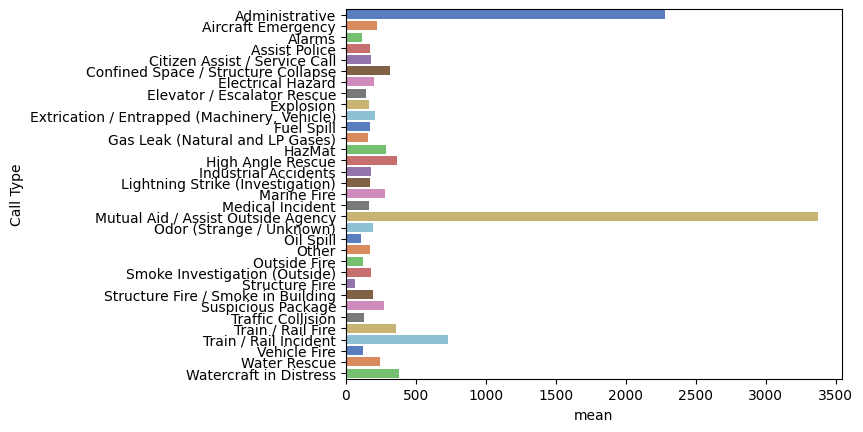

In [33]:
sns.barplot(data=call_type_eda, x = 'mean', y = 'Call Type', palette= 'muted')

<Axes: xlabel='mean', ylabel='Call Final Disposition'>

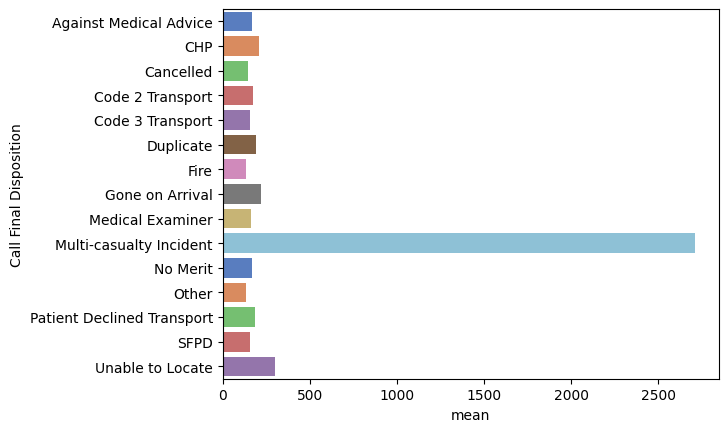

In [34]:
sns.barplot(data=disposition_eda, x = 'mean', y = 'Call Final Disposition', palette = 'muted')

<Axes: xlabel='mean', ylabel='Battalion'>

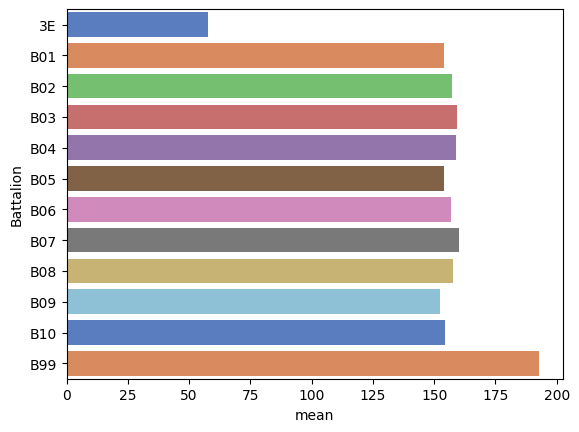

In [35]:
sns.barplot(data=battalion_eda, x = 'mean', y = 'Battalion', palette= 'muted')